## Predicting Heart Disease using  Classification of Machine Learning

### Problem Definition 

In tihs study, the problem we will be exploring is binary classification.

Our aim, given the clinical parameters of a patient, can we predict whether patient has heart disease?
For this, the scores that will be used and obtained from the ML algorithms will be compared.

### Data

The original data came from here: https://archive.ics.uci.edu/ml/datasets/heart+Disease

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to 
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. 

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory. 

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

### Features

Data Dictionary

1. age: Displays the age of the individual.

2. sex: Displays the gender of the individual using the following format : 1 = male 0 = female

3. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format: 
- 0 = typical angina 
- 1 = atypical angina 
- 2 = non — anginal pain 
- 3 = asymptotic

4. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

7. restecg- Resting ECG : displays resting electrocardiographic results:
- 0 = normal 
- 1 = having ST-T wave abnormality 
- 2 = left ventricular hyperthrophy

8. thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

9. exang- Exercise induced angina :1 = yes 0 = no

10. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. slope- Slope of the peak exercise ST segment : 
- 0 = upsloping: better heart rate with excercise (uncommon) 
- 1 = flat: minimal change (typical healthy heart) 
- 2 = downsloping: signs of unhealthy heart

12. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. thal : Displays the thalassemia : 
- 1,3 = normal 
- 6 = fixed defect 
- 7 = reversible defect: no proper blood movement when excercising

14. target : Displays whether the individua

### İmport Library and Create DataFrame

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

## Models
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve,auc
from sklearn.metrics import roc_auc_score,roc_curve

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Create DataFrame
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Exploratory Data Analysis (EDA)

In [3]:
#check missing value 

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We have 303 row and 14 columns.   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#check positive(1) and negative(0) samples in target column 
print('There are {} positive and {} negative values in the target column.'.format((len(df[df["target"]==1])),
                                                                                 (len(df[df["target"]==0]))))


There are 165 positive and 138 negative values in the target column.


In [7]:
#Normalized value count and view with %
df["target"].value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

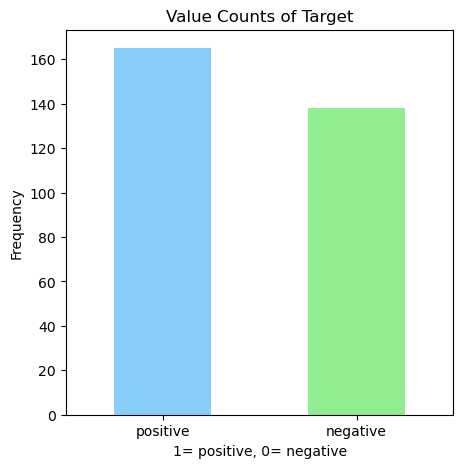

In [8]:
#plot value counts of target
df["target"].value_counts().plot(kind="bar",
                                figsize=(5,5),
                                color =["lightskyblue","lightgreen"])
plt.title("Value Counts of Target")
plt.xlabel("1= positive, 0= negative")
plt.ylabel("Frequency")
plt.xticks([0,1],["positive","negative"],rotation=0);

In [9]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


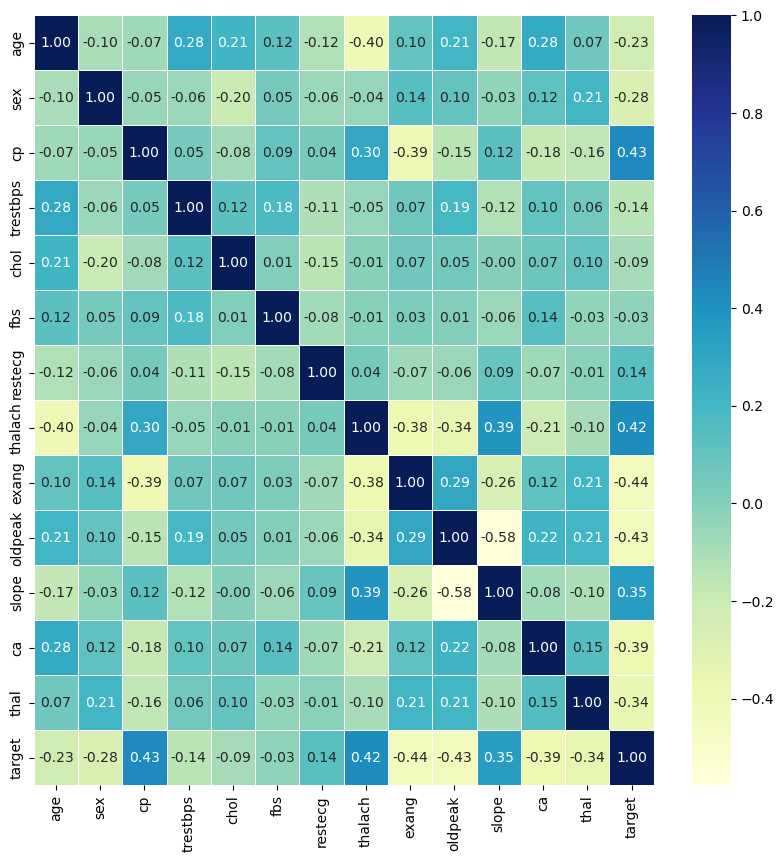

In [10]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=corr_matrix,
           annot=True,
           linewidths=0.5,
           cmap="YlGnBu",
           ax=ax, 
           fmt= '.2f');

We want to see correlation between target and other features. **BURAYA BİRKAÇ CÜMLE DAHA EKLENECEK**

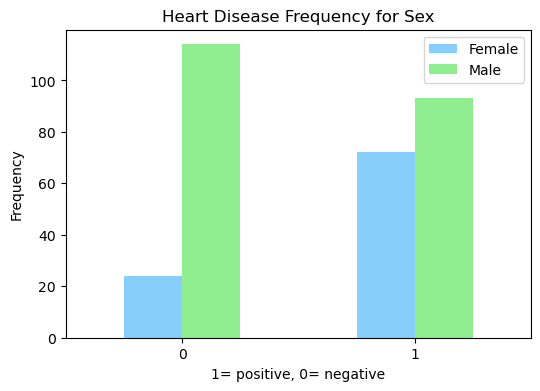

In [11]:
pd.crosstab(df["target"], df["sex"]).plot(kind = "bar",
                                         figsize =(6,4),
                                         color =["lightskyblue","lightgreen"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("1= positive, 0= negative")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.legend(["Female","Male"]);

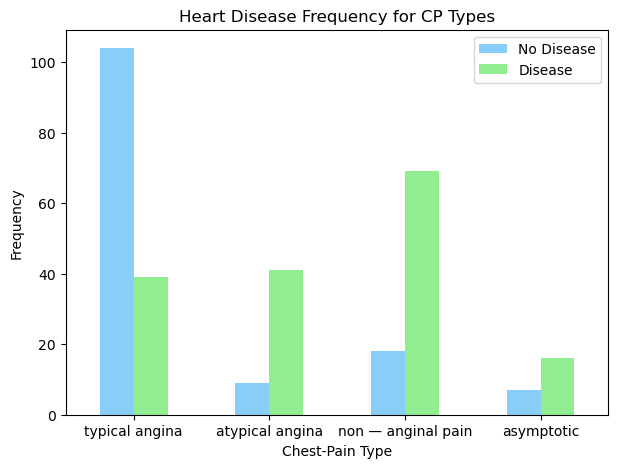

In [12]:
pd.crosstab(df["cp"], df["target"]).plot(kind = "bar",
                                         figsize =(7,5),
                                         color =["lightskyblue","lightgreen"])
plt.title("Heart Disease Frequency for CP Types")
plt.xlabel("Chest-Pain Type")
plt.legend(["No Disease", "Disease"])
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3],["typical angina", "atypical angina", "non — anginal pain", "asymptotic"]);

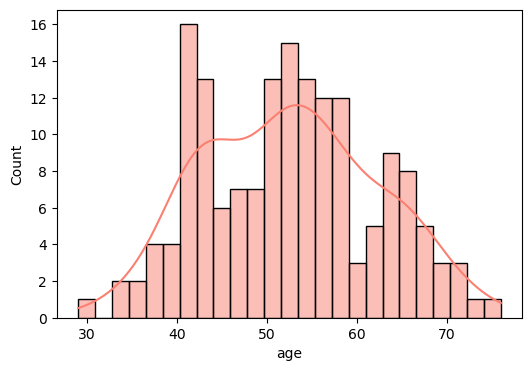

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df.age[df.target==1], 
             kde=True,color="salmon",
            bins=25);

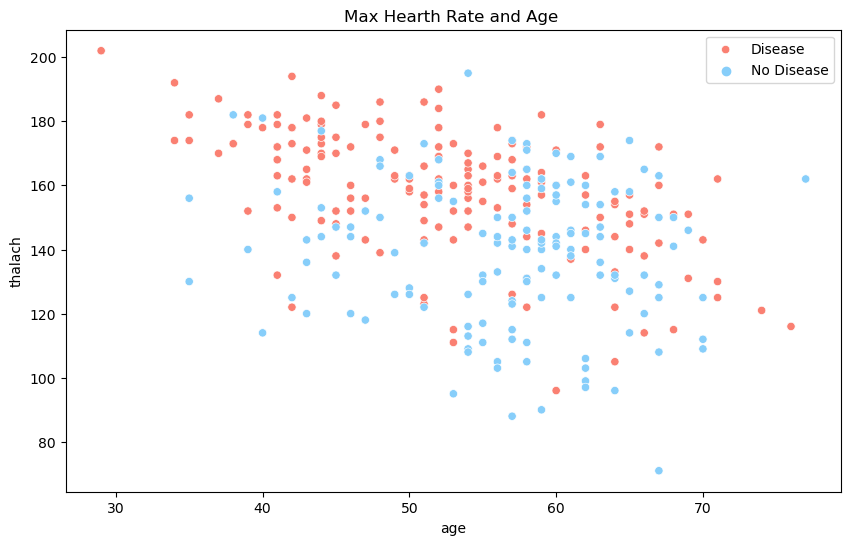

In [14]:
plt.figure(figsize=(10,6))
#sns.set_theme(style="whitegrid")
sns.scatterplot(x="age", y ="thalach", hue="target",
                palette=("lightskyblue","salmon"),
                data=df)
plt.title("Max Hearth Rate and Age ")
plt.legend(["Disease","No Disease"]);

### Training and Test Split

In [15]:
#Independent variables
X=df.drop("target", axis=1)

y= df["target"]

print("X=",X.shape)
print("y=", y.shape )

X= (303, 13)
y= (303,)


In [16]:
#Siplit into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)

print("X_train=", X_train.shape)
print("X_test=", X_test.shape)
print("y_train=", y_train.shape)
print("y_test=", y_test.shape)

X_train= (242, 13)
X_test= (61, 13)
y_train= (242,)
y_test= (61,)


### Model Choices 

We'll try choosing the right estimator. Since this case compatible with classification, we choose following algorithm:   
- Stats Model
- Logistic Regression
- K-Nearest Neighbors
- RandomForest
- SVC
- CART
- XGBOOST

In [17]:
#StatsModel

loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.4893
Time:                        11:12:07   Log-Likelihood:                -106.64
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 4.088e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0128      0.019      0.670      0.503      -0.025       0.050
sex           -1.6381      0.452     -3.625      0.000      -2.524      -0.752
cp             0.8490      0.184      4.613      0.000       0.488       1.210
trestbps      -0.0153      0.010     -1.562      0.118      -0.035       0.004
chol          -0.0036      0.004     -0.960      0.337      -0.011       0.004
fbs           -0.0115      0.526     -0.022      0.983      -1.042       1.019
restecg        0.5432      0.342      1.589      0.112      -0.127       1.213
thalach        0.0319      0.008      3.779      0.000       0.015       0.048
exang         -0.8920      0.403     -2.215      0.027      -1.681      -0.103
oldpeak       -0.4988      0.209     -2.381      0.017      -0.909      -0.088
slope          0.6092      0.346      1.761      0.078      -0.069       1.287
ca            -0.7725      0.189     -4.080      0.000      -1.144      -0.401
thal          -0.8438      0.287     -2.937      0.003      -1.407      -0.281
==============================================================================
"""

In [18]:
# Put models in a dictionary

models= {"Logistic Regression": LogisticRegression(),
         "K-Nearest Neighbors": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "SVC_linear": SVC(kernel = "linear"),
         "SVC_RBF":SVC(kernel = "rbf"),
         "CART": DecisionTreeClassifier()}

# Create function to model and fit
def fit_and_score(models_, X_train_, X_test_, y_train_, y_test_):
    """
    Fit machine learning models and calculate the fitted model.
    """
    model_scores={}
    
    for score, model in models.items():
        model.fit(X_train, y_train)
        model_scores[score] = model.score(X_test,y_test)
    return model_scores

model_scores = fit_and_score(models_=models,
                             X_train_=X_train,
                             X_test_=X_test,
                             y_train_=y_train,
                             y_test_=y_test)
model_scores



{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'Random Forest': 0.8524590163934426,
 'SVC_linear': 0.8688524590163934,
 'SVC_RBF': 0.7049180327868853,
 'CART': 0.8524590163934426}

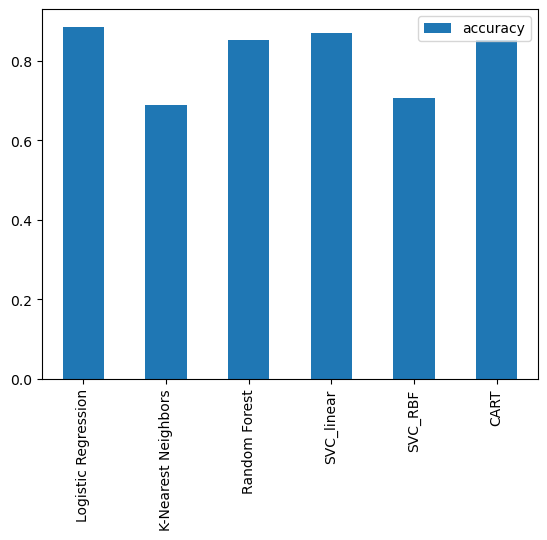

In [19]:
model_acc= pd.DataFrame(model_scores, index=['accuracy'])
model_acc.T.plot(kind="bar");

### Roc Curved 

In [20]:
def plot_roc(xtest,ytest,models):
    
    for name,model in models.items():

        if hasattr(model,'decision_function'):
            probs=model.decision_function(xtest) 
        elif hasattr(model,'predict_proba'):
            probs=model.predict_proba(xtest) [:,1]
        fpr,tpr,threshold=roc_curve(ytest,probs)
        roc_auc=auc(fpr,tpr)
        print(name,'ROC AUC = %0.2f'%roc_auc)  
        plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))
        
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.show()

Logistic Regression ROC AUC = 0.93
K-Nearest Neighbors ROC AUC = 0.76
Random Forest ROC AUC = 0.93
SVC_linear ROC AUC = 0.92
SVC_RBF ROC AUC = 0.84
CART ROC AUC = 0.86


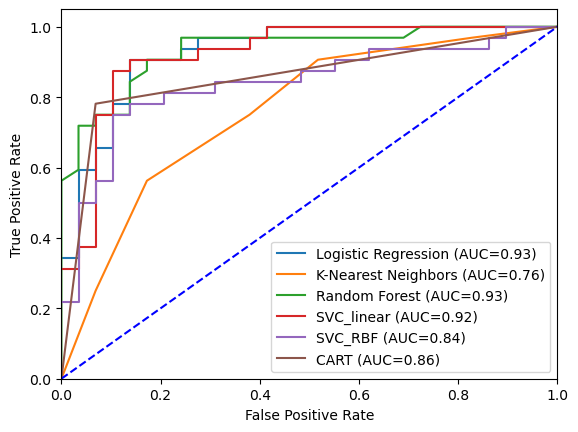

In [21]:
plot_roc(X_test,y_test,models)

When we look at the ROC curve and AUC, the following are selected:

- Logistic Regression
- Random Forest
- SVC_linear 